In [1]:
# !pip install census
# !pip install us

In [2]:
from census import Census
from us import states
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean



In [3]:
API_KEY = '8206bc1789ae1bb3348218afaa09fa0f680744f5'
c = Census(API_KEY)

In [4]:
def get_demographics_data(state, district, year):

    state_fips = states.lookup(state).fips


    data = c.acs5.state_congressional_district(
        ('NAME', 'B01003_001E',
        'B02001_002E',
        'B02001_003E',
        'B02001_004E',
        'B02001_005E',
        'B02001_006E',
        'B02001_007E',
        'B02001_008E',
        'B01001_007E',
        'B01001_008E',
        'B01001_009E',
        'B01001_010E',
        'B01001_011E',
        'B01001_012E',
        'B01001_013E',
        'B01001_014E',  # Age: 40 to 44 years
        'B01001_015E',  # Age: 45 to 49 years
        'B01001_016E',  # Age: 50 to 54 years
        'B01001_017E',  # Age: 55 to 59 years
        'B01001_018E',  # Age: 60 to 61 years
        'B01001_019E',  # Age: 62 to 64 years
        'B01001_020E',  # Age: 65 to 66 years
        'B01001_021E',  # Age: 67 to 69 years
        'B01001_022E',  # Age: 70 to 74 years
        'B01001_023E',  # Age: 75 to 79 years
        'B01001_024E',  # Age: 80 to 84 years
        'B01001_025E',  # Age: 85 years and over
        'B01001_002E',  # Male total
        'B01001_026E',  # Female total
        'B19013_001E',
        'B15003_001E',
        'B23025_005E'
        ),
        state_fips, district, year=year)

    df = pd.DataFrame(data)

    df = df.rename(columns={
        'NAME': 'District',
        'B01003_001E': 'Total_Population',
        'B02001_002E': 'White_Alone',
        'B02001_003E': 'Black_or_African_American_Alone',
        'B02001_004E': 'American_Indian_and_Alaska_Native_Alone',
        'B02001_005E': 'Asian_Alone',
        'B02001_006E': 'Native_Hawaiian_and_Other_Pacific_Islander_Alone',
        'B02001_007E': 'Some_Other_Race_Alone',
        'B02001_008E': 'Two_or_More_Races',
        'B01001_002E': 'Male_Population',
        'B01001_026E': 'Female_Population',
        'B19013_001E': 'Median_Household_Income',
        'B15003_001E': 'Educational_Attainment',
        'B23025_005E': 'Unemployment'
    })

    df['18-34'] = (df['B01001_007E'] + df['B01001_008E'] + df['B01001_009E'] +
                        df['B01001_010E'] + df['B01001_011E'] + df['B01001_012E'])

    df['35-64'] = (df['B01001_013E'] + df['B01001_014E'] + df['B01001_015E'] +
                                df['B01001_016E'] + df['B01001_017E'] + df['B01001_018E'] +
                                df['B01001_019E'])

    df['65 and older'] = (df['B01001_020E'] + df['B01001_021E'] + df['B01001_022E'] +
                    df['B01001_023E'] + df['B01001_024E'] + df['B01001_025E'])

    df['Male_Percentage'] = (df['Male_Population'] / df['Total_Population']) * 100
    df['Female_Percentage'] = (df['Female_Population'] / df['Total_Population']) * 100

    df['White_Percentage'] = (df['White_Alone'] / df['Total_Population']) * 100
    df['Black_Percentage'] = (df['Black_or_African_American_Alone'] / df['Total_Population']) * 100
    df['American_Indian_Percentage'] = (df['American_Indian_and_Alaska_Native_Alone'] / df['Total_Population']) * 100
    df['Asian_Percentage'] = (df['Asian_Alone'] / df['Total_Population']) * 100
    df['Native_Hawaiian_Percentage'] = (df['Native_Hawaiian_and_Other_Pacific_Islander_Alone'] / df['Total_Population']) * 100
    df['Other_Race_Percentage'] = (df['Some_Other_Race_Alone'] / df['Total_Population']) * 100
    df['Two_or_More_Races_Percentage'] = (df['Two_or_More_Races'] / df['Total_Population']) * 100

    df = df[['District', 'Total_Population', '18-34', '35-64',
        '65 and older', 'Male_Population', 'Female_Population', 'Male_Percentage',
        'Female_Percentage', 'White_Percentage', 'Black_Percentage',
        'American_Indian_Percentage', 'Asian_Percentage',
        'Native_Hawaiian_Percentage', 'Other_Race_Percentage',
        'Two_or_More_Races_Percentage', 'Median_Household_Income',
        'Educational_Attainment', 
        'Unemployment'
        ]]

    return df


In [5]:
df = get_demographics_data('MO', '04', 2022)

In [6]:
df[['District', 'Total_Population', '18-34', '35-64',
        '65 and older', 'Male_Population', 'Female_Population', 'Male_Percentage',
        'Female_Percentage', 'White_Percentage', 'Black_Percentage',
        'American_Indian_Percentage', 'Asian_Percentage',
        'Native_Hawaiian_Percentage', 'Other_Race_Percentage',
        'Two_or_More_Races_Percentage', 'Median_Household_Income',
        'Educational_Attainment', 
        'Unemployment'
        ]]

,District,Total_Population,18-34,35-64,65 and older,Male_Population,Female_Population,Male_Percentage,Female_Percentage,White_Percentage,Black_Percentage,American_Indian_Percentage,Asian_Percentage,Native_Hawaiian_Percentage,Other_Race_Percentage,Two_or_More_Races_Percentage,Median_Household_Income,Educational_Attainment,Unemployment
0,"Congressional District 4 (118th Congress), Mis...",771882.0,93501.0,140371.0,62193.0,386996.0,384886.0,50.136679,49.863321,87.453134,4.127185,0.361325,1.011294,0.129942,1.372749,5.544371,62643.0,514620.0,16104.0


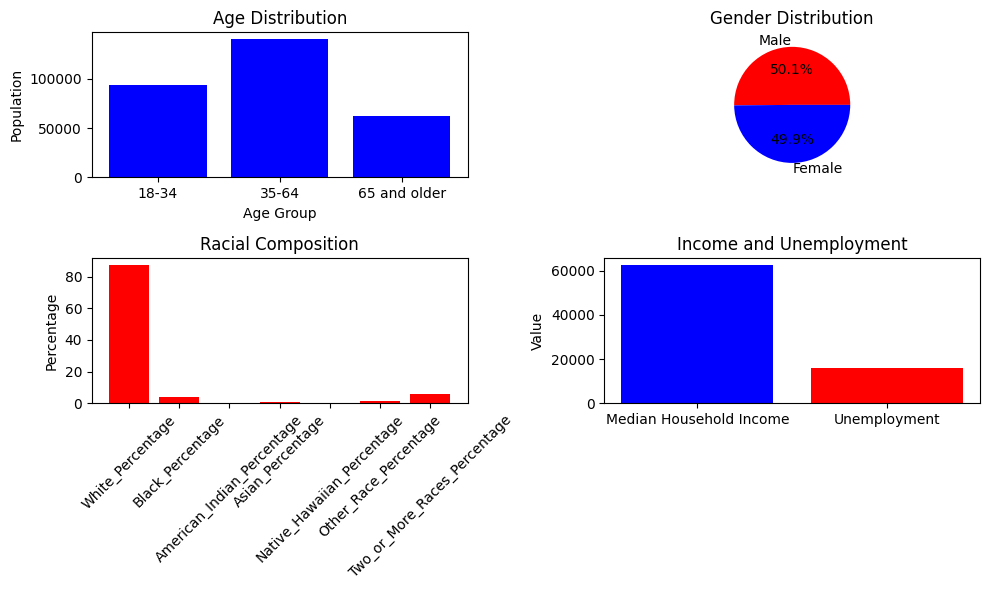

In [7]:
# Visualization
plt.figure(figsize=(10, 6))

# Age Distribution
plt.subplot(2, 2, 1)
plt.bar(['18-34', '35-64', '65 and older'], df.iloc[0][['18-34', '35-64', '65 and older']], color='blue')
plt.title('Age Distribution', color='black', fontsize=12)
plt.ylabel('Population')
plt.xlabel('Age Group')

# Gender Distribution
plt.subplot(2, 2, 2)
plt.pie(df.iloc[0][['Male_Population', 'Female_Population']], 
        labels=['Male', 'Female'], 
        autopct='%1.1f%%', 
        colors=['red', 'blue'])
plt.title('Gender Distribution', color='black', fontsize=12)

# Racial Composition
plt.subplot(2, 2, 3)
races = ['White_Percentage', 'Black_Percentage', 'American_Indian_Percentage', 'Asian_Percentage', 
         'Native_Hawaiian_Percentage', 'Other_Race_Percentage', 'Two_or_More_Races_Percentage']
plt.bar(races, df.iloc[0][races], color='red')
plt.title('Racial Composition', color='black', fontsize=12)
plt.ylabel('Percentage')
plt.xticks(rotation=45, )

# Median Household Income and Unemployment
plt.subplot(2, 2, 4)
plt.bar(['Median Household Income', 'Unemployment'], 
        df.iloc[0][['Median_Household_Income', 'Unemployment']], 
        color=['blue', 'red'])
plt.title('Income and Unemployment', color='black', fontsize=12)
plt.ylabel('Value')

plt.tight_layout()
plt.show()


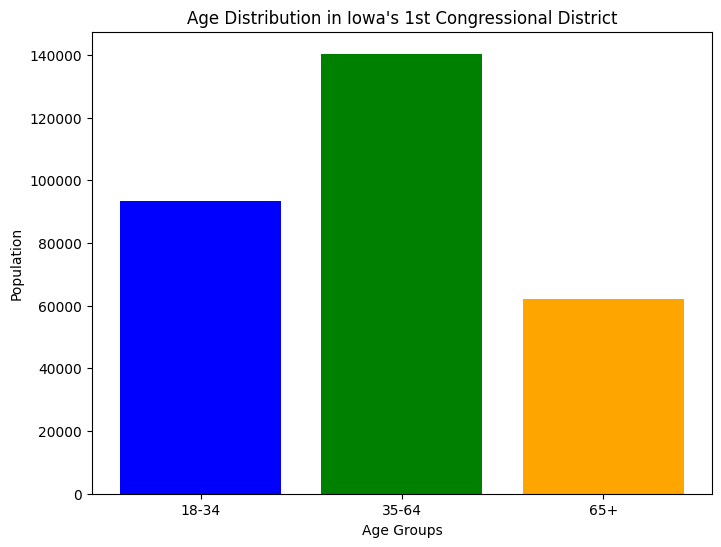

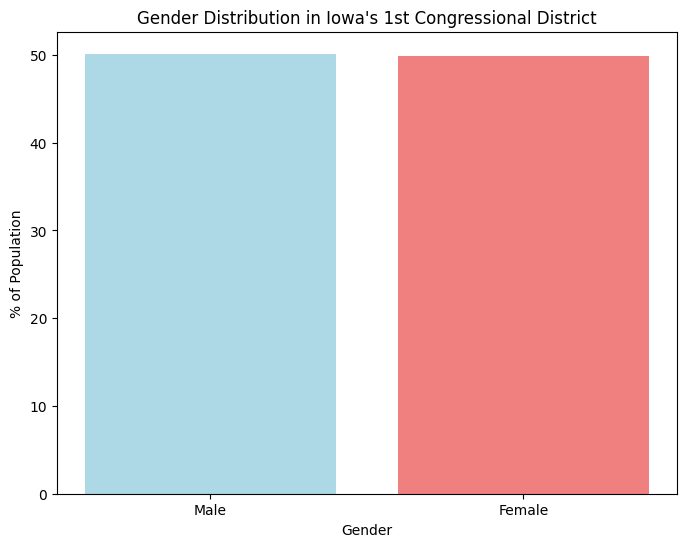

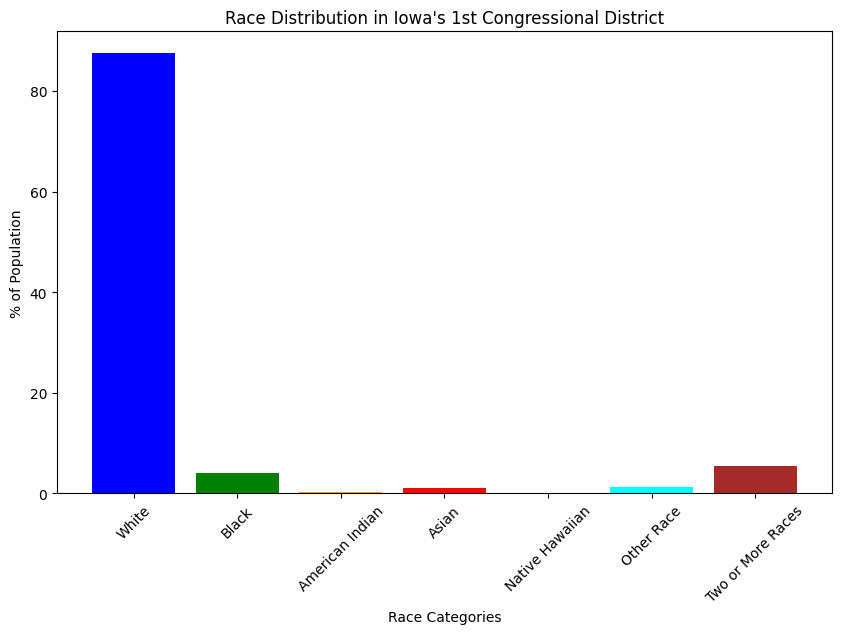

In [8]:
# Data visualization
age_categories = ['18-34', '35-64', '65+']
age_values = [df['18-34'].sum(), df['35-64'].sum(), df['65 and older'].sum()]

plt.figure(figsize=(8, 6))
plt.bar(age_categories, age_values, color=['blue', 'green', 'orange'])
plt.title('Age Distribution in Iowa\'s 1st Congressional District')
plt.ylabel('Population')
plt.xlabel('Age Groups')
plt.show()

gender_categories = ['Male', 'Female']
gender_values = [df['Male_Percentage'].sum(), df['Female_Percentage'].sum()]

plt.figure(figsize=(8, 6))
plt.bar(gender_categories, gender_values, color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution in Iowa\'s 1st Congressional District')
plt.ylabel('% of Population')
plt.xlabel('Gender')
plt.show()

race_categories = ['White', 'Black', 'American Indian', 'Asian', 'Native Hawaiian', 'Other Race', 'Two or More Races']
race_values = [df['White_Percentage'].sum(), df['Black_Percentage'].sum(),
               df['American_Indian_Percentage'].sum(), df['Asian_Percentage'].sum(),
               df['Native_Hawaiian_Percentage'].sum(), df['Other_Race_Percentage'].sum(),
               df['Two_or_More_Races_Percentage'].sum()]

plt.figure(figsize=(10, 6))
plt.bar(race_categories, race_values, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'brown'])
plt.title('Race Distribution in Iowa\'s 1st Congressional District')
plt.ylabel('% of Population')
plt.xlabel('Race Categories')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Function to figure out the districts that have similar demographics to our district (Iowa's first congressional district)
def calculate_similarity(district1_row, district2_row):
    percentage_columns = [
        'Male_Percentage', 'Female_Percentage', 'White_Percentage', 'Black_Percentage',
        'American_Indian_Percentage', 'Asian_Percentage', 'Native_Hawaiian_Percentage',
        'Other_Race_Percentage', 'Two_or_More_Races_Percentage'
    ]

    # Extract only the percentage columns for both districts
    district1_values = district1_row[percentage_columns].values.flatten()  # Ensuring a 1D array
    district2_values = district2_row[percentage_columns].values.flatten()  # Ensuring a 1D array

    # Calculate Euclidean distance
    distance = euclidean(district1_values, district2_values)

    return distance

In [10]:
# Function to fetch data for a specific district
def fetch_district_data(state_fips, district_number):
    try:
        data = c.acs5.state_congressional_district(
            ('NAME', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E',
             'B02001_006E', 'B02001_007E', 'B02001_008E', 'B01001_002E', 'B01001_026E',
             'B19013_001E', 'B15003_001E', 'B23025_005E'),
            state_fips, district_number, year=2022)
        return data
    except Exception as e:
        print(f"Failed to fetch data for district {district_number}: {e}")
        return None

neighbouring_states = {
    states.WI.fips: 8,
    states.MN.fips: 8,
    states.NE.fips: 3,
    states.KS.fips: 4,
    states.MO.fips: 8,
    states.IL.fips: 17
}
districts_data = []
for neighbor, num_of_districts in neighbouring_states.items():
    print(f'--- {neighbor} ---')
    # Fetch data for neighbouring states
    for district_number in range(1, num_of_districts + 1):
      if district_number < 10:
        district_data = fetch_district_data(neighbor,'0'+str(district_number))
        print(district_data)
      else:
        district_data = fetch_district_data(neighbor,str(district_number))
        print(district_data)

      if district_data:
          districts_data.append(district_data[0])


# Convert the result to a pandas DataFrame
df_other = pd.DataFrame(districts_data)

# Rename columns for better readability
df_other = df_other.rename(columns={
    'NAME': 'District',
    'B01003_001E': 'Total_Population',
    'B02001_002E': 'White_Alone',
    'B02001_003E': 'Black_or_African_American_Alone',
    'B02001_004E': 'American_Indian_and_Alaska_Native_Alone',
    'B02001_005E': 'Asian_Alone',
    'B02001_006E': 'Native_Hawaiian_and_Other_Pacific_Islander_Alone',
    'B02001_007E': 'Some_Other_Race_Alone',
    'B02001_008E': 'Two_or_More_Races',
    'B01001_002E': 'Male_Population',
    'B01001_026E': 'Female_Population',
    'B19013_001E': 'Median_Household_Income',
    'B15003_001E': 'Educational_Attainment',
    'B23025_005E': 'Unemployment'
})

# Add percentage columns for comparison
df_other['Male_Percentage'] = (df_other['Male_Population'] / df_other['Total_Population']) * 100
df_other['Female_Percentage'] = (df_other['Female_Population'] / df_other['Total_Population']) * 100
df_other['White_Percentage'] = (df_other['White_Alone'] / df_other['Total_Population']) * 100
df_other['Black_Percentage'] = (df_other['Black_or_African_American_Alone'] / df_other['Total_Population']) * 100
df_other['American_Indian_Percentage'] = (df_other['American_Indian_and_Alaska_Native_Alone'] / df_other['Total_Population']) * 100
df_other['Asian_Percentage'] = (df_other['Asian_Alone'] / df_other['Total_Population']) * 100
df_other['Native_Hawaiian_Percentage'] = (df_other['Native_Hawaiian_and_Other_Pacific_Islander_Alone'] / df_other['Total_Population']) * 100
df_other['Other_Race_Percentage'] = (df_other['Some_Other_Race_Alone'] / df_other['Total_Population']) * 100
df_other['Two_or_More_Races_Percentage'] = (df_other['Two_or_More_Races'] / df_other['Total_Population']) * 100


--- 55 ---
[{'NAME': 'Congressional District 1 (118th Congress), Wisconsin', 'B01003_001E': 733336.0, 'B02001_002E': 590887.0, 'B02001_003E': 45120.0, 'B02001_004E': 2549.0, 'B02001_005E': 14218.0, 'B02001_006E': 376.0, 'B02001_007E': 23022.0, 'B02001_008E': 57164.0, 'B01001_002E': 364575.0, 'B01001_026E': 368761.0, 'B19013_001E': 74228.0, 'B15003_001E': 505978.0, 'B23025_005E': 15609.0, 'state': '55', 'congressional district': '01'}]
[{'NAME': 'Congressional District 2 (118th Congress), Wisconsin', 'B01003_001E': 735105.0, 'B02001_002E': 614043.0, 'B02001_003E': 29468.0, 'B02001_004E': 2005.0, 'B02001_005E': 34146.0, 'B02001_006E': 342.0, 'B02001_007E': 10924.0, 'B02001_008E': 44177.0, 'B01001_002E': 369001.0, 'B01001_026E': 366104.0, 'B19013_001E': 81786.0, 'B15003_001E': 495256.0, 'B23025_005E': 10093.0, 'state': '55', 'congressional district': '02'}]
[{'NAME': 'Congressional District 3 (118th Congress), Wisconsin', 'B01003_001E': 735541.0, 'B02001_002E': 672828.0, 'B02001_003E': 86

In [11]:
df_other['similarity'] = df_other.apply(lambda row: calculate_similarity(df.iloc[0], row), axis=1)

most_similar_districts = df_other.nsmallest(2, 'similarity')

print(most_similar_districts[['District', 'similarity']])

                                             District  similarity
26  Congressional District 4 (118th Congress), Mis...    0.000000
25  Congressional District 3 (118th Congress), Mis...    1.928799


In [12]:
df_other_sorted = df_other.sort_values(by='similarity', ascending=True)

for district in df_other_sorted['District'][:20]:
    print(district)

Congressional District 4 (118th Congress), Missouri
Congressional District 3 (118th Congress), Missouri
Congressional District 8 (118th Congress), Missouri
Congressional District 6 (118th Congress), Missouri
Congressional District 1 (118th Congress), Minnesota
Congressional District 6 (118th Congress), Minnesota
Congressional District 7 (118th Congress), Missouri
Congressional District 16 (118th Congress), Illinois
Congressional District 12 (118th Congress), Illinois
Congressional District 8 (118th Congress), Wisconsin
Congressional District 5 (118th Congress), Wisconsin
Congressional District 6 (118th Congress), Wisconsin
Congressional District 2 (118th Congress), Missouri
Congressional District 3 (118th Congress), Nebraska
Congressional District 1 (118th Congress), Nebraska
Congressional District 7 (118th Congress), Minnesota
Congressional District 8 (118th Congress), Minnesota
Congressional District 2 (118th Congress), Wisconsin
Congressional District 15 (118th Congress), Illinois
C

In [13]:
df_other = df_other.sort_values(by='similarity')
df_other.head()


,District,Total_Population,White_Alone,Black_or_African_American_Alone,American_Indian_and_Alaska_Native_Alone,Asian_Alone,Native_Hawaiian_and_Other_Pacific_Islander_Alone,Some_Other_Race_Alone,Two_or_More_Races,Male_Population,...,Male_Percentage,Female_Percentage,White_Percentage,Black_Percentage,American_Indian_Percentage,Asian_Percentage,Native_Hawaiian_Percentage,Other_Race_Percentage,Two_or_More_Races_Percentage,similarity
26,"Congressional District 4 (118th Congress), Mis...",771882.0,675035.0,31857.0,2789.0,7806.0,1003.0,10596.0,42796.0,386996.0,...,50.136679,49.863321,87.453134,4.127185,0.361325,1.011294,0.129942,1.372749,5.544371,0.000000
25,"Congressional District 3 (118th Congress), Mis...",770039.0,674363.0,36741.0,1381.0,16677.0,519.0,6530.0,33828.0,382993.0,...,49.736832,50.263168,87.575175,4.771317,0.179342,2.165734,0.067399,0.848009,4.393024,1.928799
30,"Congressional District 8 (118th Congress), Mis...",772194.0,689808.0,31298.0,1709.0,6192.0,268.0,4463.0,38456.0,387250.0,...,50.149315,49.850685,89.330919,4.053127,0.221317,0.801871,0.034706,0.577964,4.980096,2.134128
28,"Congressional District 6 (118th Congress), Mis...",769064.0,686997.0,28264.0,2566.0,8981.0,1219.0,8956.0,32081.0,384860.0,...,50.042649,49.957351,89.328977,3.675117,0.333652,1.167783,0.158504,1.164532,4.171434,2.386464
8,"Congressional District 1 (118th Congress), Min...",712863.0,616004.0,26113.0,2651.0,19993.0,522.0,16151.0,31429.0,357954.0,...,50.213575,49.786425,86.412677,3.663116,0.371881,2.804606,0.073226,2.265653,4.408842,2.572107


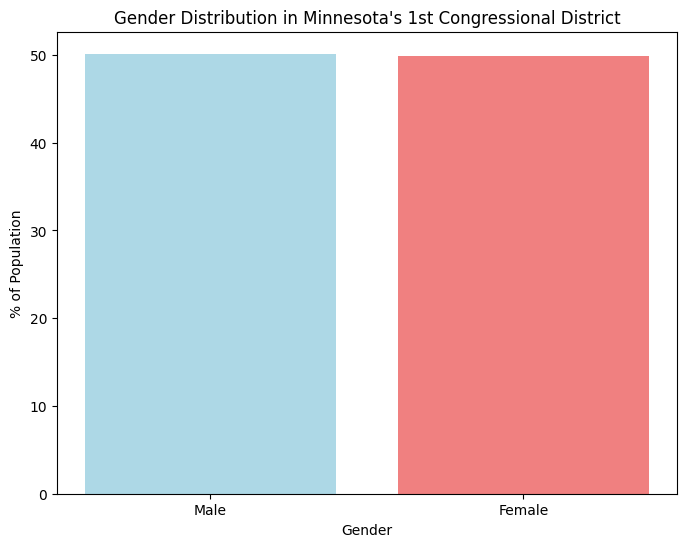

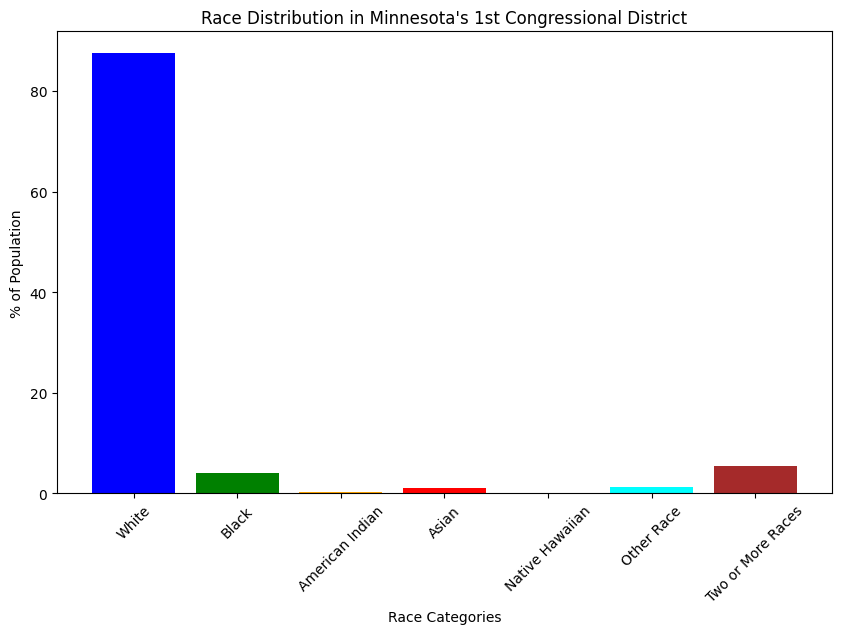

In [14]:
# Data visualization
minn_first_dist = df_other.iloc[0]

gender_categories = ['Male', 'Female']
gender_values = [minn_first_dist['Male_Percentage'].sum(), minn_first_dist['Female_Percentage'].sum()]

plt.figure(figsize=(8, 6))
plt.bar(gender_categories, gender_values, color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution in Minnesota\'s 1st Congressional District')
plt.ylabel('% of Population')
plt.xlabel('Gender')
plt.show()

race_categories = ['White', 'Black', 'American Indian', 'Asian', 'Native Hawaiian', 'Other Race', 'Two or More Races']
race_values = [minn_first_dist['White_Percentage'], minn_first_dist['Black_Percentage'], minn_first_dist['American_Indian_Percentage'],
               minn_first_dist['Asian_Percentage'], minn_first_dist['Native_Hawaiian_Percentage'],
               minn_first_dist['Other_Race_Percentage'], minn_first_dist['Two_or_More_Races_Percentage'],
               ]

plt.figure(figsize=(10, 6))
plt.bar(race_categories, race_values, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'brown'])
plt.title('Race Distribution in Minnesota\'s 1st Congressional District')
plt.ylabel('% of Population')
plt.xlabel('Race Categories')
plt.xticks(rotation=45)
plt.show()

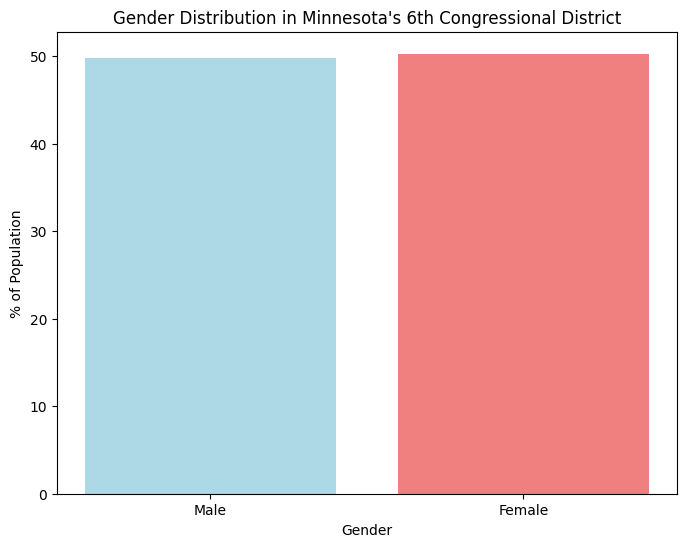

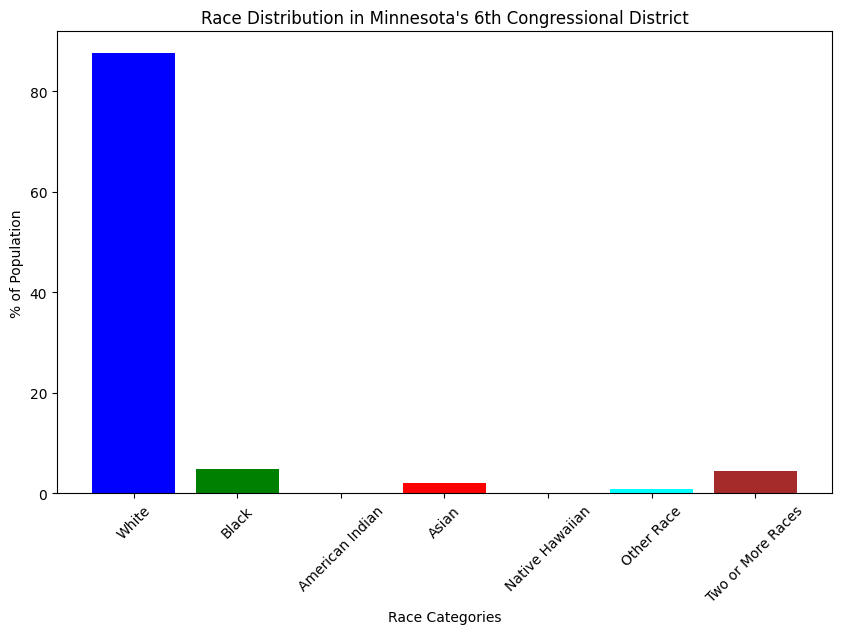

In [15]:
# Data visualization
minn_sixth_dist = df_other.iloc[1]

gender_categories = ['Male', 'Female']
gender_values = [minn_sixth_dist['Male_Percentage'].sum(), minn_sixth_dist['Female_Percentage'].sum()]

plt.figure(figsize=(8, 6))
plt.bar(gender_categories, gender_values, color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution in Minnesota\'s 6th Congressional District')
plt.ylabel('% of Population')
plt.xlabel('Gender')
plt.show()

race_categories = ['White', 'Black', 'American Indian', 'Asian', 'Native Hawaiian', 'Other Race', 'Two or More Races']
race_values = [minn_sixth_dist['White_Percentage'], minn_sixth_dist['Black_Percentage'], minn_sixth_dist['American_Indian_Percentage'],
               minn_sixth_dist['Asian_Percentage'], minn_sixth_dist['Native_Hawaiian_Percentage'],
               minn_sixth_dist['Other_Race_Percentage'], minn_sixth_dist['Two_or_More_Races_Percentage'],
               ]

plt.figure(figsize=(10, 6))
plt.bar(race_categories, race_values, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'brown'])
plt.title('Race Distribution in Minnesota\'s 6th Congressional District')
plt.ylabel('% of Population')
plt.xlabel('Race Categories')
plt.xticks(rotation=45)
plt.show()